## An end to end workflow

In [1]:
import pandas as pd
heart_desease = pd.read_csv('heart-disease.csv')
heart_desease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X = heart_desease.drop('target', axis=1)
Y = heart_desease['target']

In [4]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [6]:
clf.fit(X_train, y_train);

In [7]:
y_preds = clf.predict(X_test)

In [8]:
y_preds

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1])

In [9]:
y_test

167    0
188    0
23     1
293    0
226    0
      ..
269    0
4      1
236    0
9      1
118    1
Name: target, Length: 61, dtype: int64

In [10]:
# Evaluate the model on the training data and teest data
clf.score(X_train, y_train)

1.0

In [11]:
clf.score(X_test, y_test)

0.8032786885245902

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        27
           1       0.82      0.82      0.82        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [13]:
confusion_matrix(y_test, y_preds)

array([[21,  6],
       [ 6, 28]])

In [14]:
accuracy_score(y_test, y_preds)

0.8032786885245902

In [15]:
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print(" ")

Trying model with 10 estimators...
Model accuracy on test set: 73.77%
 
Trying model with 20 estimators...
Model accuracy on test set: 73.77%
 
Trying model with 30 estimators...
Model accuracy on test set: 78.69%
 
Trying model with 40 estimators...
Model accuracy on test set: 77.05%
 
Trying model with 50 estimators...
Model accuracy on test set: 78.69%
 
Trying model with 60 estimators...
Model accuracy on test set: 81.97%
 
Trying model with 70 estimators...
Model accuracy on test set: 77.05%
 
Trying model with 80 estimators...
Model accuracy on test set: 75.41%
 
Trying model with 90 estimators...
Model accuracy on test set: 78.69%
 


In [16]:
# 6. Save a model and load it
import pickle
pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [17]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.7868852459016393

## Getting data ready to be used with machine learning


In [18]:
heart_desease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
X = heart_desease.drop('target', axis=1)

In [20]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y = heart_desease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### Make sure it's all numerical

In [24]:
car_sales = pd.read_csv('data/car-sales-extended.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [25]:
x = car_sales.drop('Price', axis=1)
y = car_sales['Price']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [27]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [28]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [29]:
# refit the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
np.random.seed(42)
x_train, x_test, y_train, y_teest = train_test_split(transformed_x, y, test_size=0.2)

model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [30]:
model.score(x_test, y_test)

-0.6789782769002013

### What if there were missing values?

In [31]:
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [32]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [33]:
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing['Price']

### Fill missing data with pandas

In [34]:
car_sales_missing['Make'].fillna('missing', inplace=True)
car_sales_missing['Colour'].fillna('missing', inplace=True)

In [35]:
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)
car_sales_missing['Doors'].fillna(4, inplace=True)

In [36]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [37]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [38]:
car_sales_missing.dropna(inplace=True)

In [39]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [40]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [41]:
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing['Price']

In [42]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')
transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [43]:
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [44]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [45]:
car_sales_missing.dropna(subset=['Price'], inplace=True)

In [46]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [47]:
x = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [48]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_features = ['Make', 'Colour']
door_feature = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_feature),
    ('num_imputer', num_imputer, num_features)
])

# Transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [49]:
car_sales_filled = pd.DataFrame(filled_x, columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [50]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [51]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [52]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.21990196728583944

In [53]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [54]:
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [55]:
from sklearn.linear_model import Ridge
np.random.seed(42)

x = boston_df.drop('target', axis = 1)
y = boston_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = Ridge()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.6662221670168518

In [56]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop('target', axis=1)
y = boston_df['target']

rf = RandomForestRegressor()
rf.fit(x_train, y_train)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
rf.score(x_test, y_test)

0.9682429626355905

In [57]:
model.score(x_test, y_test)

0.8072384922488055

# Classification Problem

In [58]:
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_desease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Try LinearSVC

In [59]:
from sklearn.svm import LinearSVC

np.random.seed(42)

X = heart_desease.drop('target', axis=1)
y = heart_desease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearSVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.47540983606557374

In [60]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_desease.drop('target', axis=1)
y = heart_desease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

### Fittin the model to the data

In [61]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_desease.drop('target', axis=1)
y = heart_desease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

### Make predictions using a ML model

In [62]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [63]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [64]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

### With predict_proba()

### `predict()` can also be used for regression models

In [66]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = boston_df.drop('target', axis = 1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor().fit(X_train, y_train)
y_preds = model.predict(X_test)

In [67]:
y_preds[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [68]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [69]:
# Compare predictions to the true
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.1226372549019623

## Evaluating a machine learning

In [70]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
clf.score(X_train, y_train)

1.0

In [72]:
clf.score(X_test, y_test)

0.8524590163934426

In [73]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = boston_df.drop('target', axis = 1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor().fit(X_train, y_train)


In [74]:
model.score(X_test, y_test)

0.873969014117403

## Evaluating a model using `scoring` parameter

In [75]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train);

In [76]:
clf.score(X_test, y_test)

0.8524590163934426

In [77]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [78]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [79]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# Compare two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [80]:
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### Classification model evaluation metrics

In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)

In [82]:
np.mean(cross_val_score)

0.8248087431693989

## Using `scoring` parameter

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier(n_estimators=100)

In [84]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [85]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [86]:
# Precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
np.mean(cv_precision)

0.8085601538512754

### Using diff evalution metrics as scikit-learn functions

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print('Classifier metrics on the test set')
print(f'Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'F1: {f1_score(y_test, y_preds)}')
      

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


**Regression evaluation metrics**

In [88]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

print('Regression model metrics on the test set')
print(f'R2: {r2_score(y_test, y_preds)}')
print(f'MAE: {mean_absolute_error(y_test, y_preds)}')
print(f'MSE: {mean_squared_error(y_test, y_preds)}')

Regression model metrics on the test set
R2: 0.8739690141174031
MAE: 2.1226372549019623
MSE: 9.242328990196082


### Improving a model

In [89]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Tuning hyperparameters by hand

In [90]:
def evaluate_preds(y_true, y_preds):
    '''
    Performs evaluation comparison on y_true labels vs y_preds labels on classification
    '''
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {'accuracy': round(accuracy,2),
                   'precision': round(precision,2),
                   'recall': round(recall,2),
                   'f1': round(f1,2)}
    print(f'Acc: {accuracy * 100:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 score: {f1:.2f}')
    
    return metric_dict

In [91]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split: valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_valid)
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [92]:
np.random.seed(42)
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

y_preds_2 = clf_2.predict(X_valid)
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


### Hyperparameter tuning with RandomizeSearchCV

In [95]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators': [10, 100, 200, 500, 1000, 2000],
        'max_depth': [None, 5, 10, 20, 30],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [2,4,6],
        'min_samples_leaf': [1,2,4]}

np.random.seed(42)

X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

rs_clf = RandomizedSearchCV(estimator=clf, param_distributions=grid, n_iter=10, cv=5, verbose=2)

rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=2000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=2000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=2000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  n_estimators=2000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=2000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=2000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=2000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=2000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=2000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=2000, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.1s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   24.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [96]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30}

In [97]:
rs_y_preds = rs_clf.predict(X_test)

rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.76
Recall: 0.89
F1 score: 0.82


## With GridSearchCV

In [98]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 2000],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [99]:
grid_2 = {'n_estimators': [10, 100, 200],
        'max_depth': [20, 30],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [2,4,6],
        'min_samples_leaf': [1,2,4]}

In [101]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

gs_clf = GridSearchCV(estimator=clf, param_grid=grid_2, cv=5, verbose=2)

gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_dep

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=1,
                                              oob_score=False,
                                              random_s

In [102]:
gs_clf.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [103]:
gs_y_preds = gs_clf.predict(X_test)
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 81.97%
Precision: 0.76
Recall: 0.89
F1 score: 0.82


compare

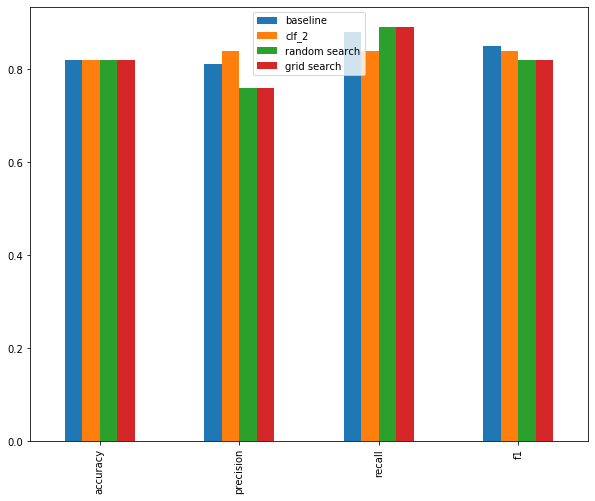

In [106]:
compare_metrics = pd.DataFrame({'baseline': baseline_metrics,
                               'clf_2': clf_2_metrics,
                               'random search': rs_metrics,
                               'grid search': gs_metrics})
compare_metrics.plot.bar(figsize=(10,8))